This dataset contains information related to real estate properties.
Attributes include property location, price, number of bedrooms, square footage of living space, lot size, floors, waterfront status, view, condition, grade, year built, year renovated, zipcode, latitude, longitude, and more.

# 1. Load the Data:
First, make sure you have pandas installed (pip install pandas).

  Load the dataset:

In [ ]:
import pandas as pd
from scipy import stats
import seaborn as sns
df= pd.read_excel("/content/Housing dataset.xlsx")
df.head() # head() give first 5 row of the dataset

,id,Property location,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,Condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,Arizona,221900,3,1180,5650,1.0,0,0,1,7,1180,0,2001,0,98178,47.5112,-122.257,1340,5650
1,6414100192,Arizona,538000,3,2570,7242,2.0,0,0,1,7,2170,400,2000,2016,98125,47.7210,-122.319,1690,7639
2,5631500400,Arizona,180000,2,770,10000,1.0,0,0,1,6,770,0,2018,0,98028,47.7379,-122.233,2720,8062
3,2487200875,Arizona,604000,4,1960,5000,1.0,0,0,0,7,1050,910,2006,2020,98136,47.5208,-122.393,1360,5000
4,1954400510,Arizona,510000,3,1680,8080,1.0,0,0,1,8,1680,0,2021,0,98074,47.6168,-122.045,1800,7503


# 2. Check shape of datatset

In [ ]:
df.shape

(21613, 20)



*   There is 21613 rows and 20 columns.




# 3. Check to number of cell in the dataset

In [ ]:
df.size

432260

#4. Check information of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21613 non-null  int64  
 1   Property location  21613 non-null  object 
 2   price              21613 non-null  int64  
 3   bedrooms           21613 non-null  int64  
 4   sqft_living        21613 non-null  int64  
 5   sqft_lot           21613 non-null  int64  
 6   floors             21613 non-null  float64
 7   waterfront         21613 non-null  int64  
 8   view               21613 non-null  int64  
 9   Condition          21613 non-null  int64  
 10  grade              21613 non-null  int64  
 11  sqft_above         21613 non-null  int64  
 12  sqft_basement      21613 non-null  int64  
 13  yr_built           21613 non-null  int64  
 14  yr_renovated       21613 non-null  int64  
 15  zipcode            21613 non-null  int64  
 16  lat                216

*   There is no null value in the dataset.



# 5.Explore Data Distribution:
*   Create a histogram to visualize the distribution of property prices:







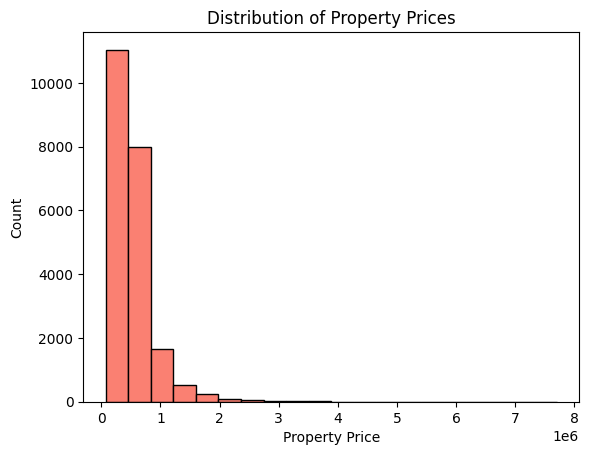

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["price"], bins=20,color=["salmon"], edgecolor="black")
plt.xlabel("Property Price")
plt.ylabel("Count")
plt.title("Distribution of Property Prices")
plt.show()


# 6. **Property Features**:

#    6.1 Number of Bedrooms vs. Property Prices:
We’ll calculate the average price for different numbers of bedrooms.




In [ ]:
bedroom_avg_price = df.groupby("bedrooms")["price"].mean()
bedroom_avg_price


bedrooms
1    467253.649635
2    401372.681884
3    466232.078481
4    635419.504214
5    786599.828857
6    825520.636029
Name: price, dtype: float64

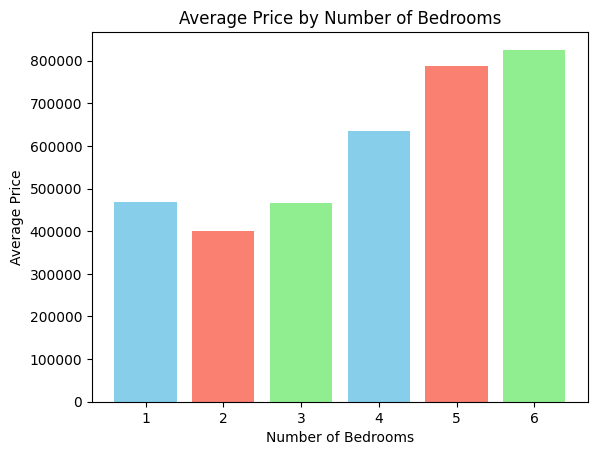

In [ ]:
# Create a bar plot
plt.bar(bedroom_avg_price.index, bedroom_avg_price.values, color=["skyblue", "salmon", "lightgreen"])
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price")
plt.title("Average Price by Number of Bedrooms")
plt.show()



*  Price is directly proportional to the number of bedrooms , but 1 bhk have more price then 2 bhk and 3 bhk.






#    6.2 Waterfront View Impact on Property Value:
We’ll compare the average price of waterfront properties with non-waterfront properties.




In [ ]:
# values 1 for waterfront , 0 for non-waterfront
waterfront_avg_price = df.groupby("waterfront")["price"].mean()
waterfront_avg_price

waterfront
0    5.315636e+05
1    1.661876e+06
Name: price, dtype: float64

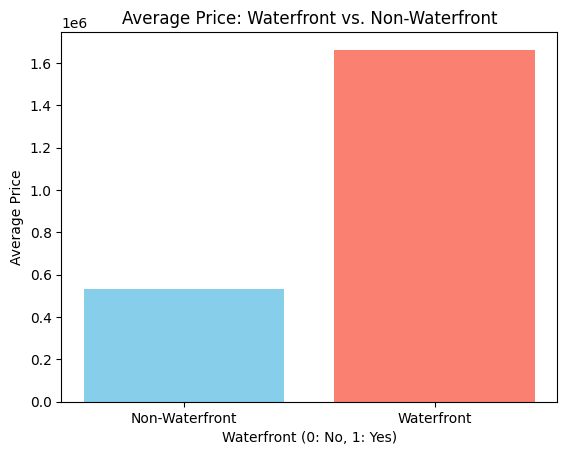

In [ ]:
# Create a bar plot
plt.bar(waterfront_avg_price.index, waterfront_avg_price.values, color=["skyblue", "salmon"])
plt.xlabel("Waterfront (0: No, 1: Yes)")
plt.ylabel("Average Price")
plt.title("Average Price: Waterfront vs. Non-Waterfront")
plt.xticks([0, 1], ["Non-Waterfront", "Waterfront"]) #to give index values name
plt.show()



*   Price is high for waterfront properties.



# 6.3 Average Property Price by Year of Construction

In [ ]:
Year_avg_price = df.groupby(["yr_built"])["price"].mean()
Year_avg_price

yr_built
2000    561639.505126
2001    538087.094862
2002    473664.990773
2003    479774.363314
2004    503072.771005
2005    549335.248031
2006    546785.306633
2007    520672.745383
2008    553038.825514
2009    514182.465324
2010    506895.566323
2011    500167.827586
2012    516935.422472
2013    678545.452736
2014    683681.754919
2015    759785.157895
2016    553410.460621
2017    573284.454206
2018    564030.161184
2019    612592.180285
2020    624699.846361
2021    555896.936430
Name: price, dtype: float64

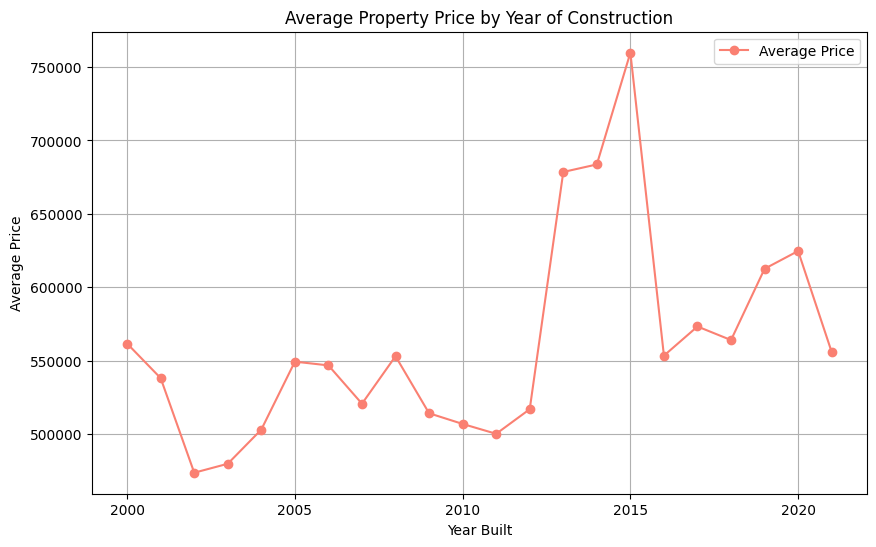

In [ ]:
years = Year_avg_price.index
avg_prices = Year_avg_price.values

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(years , avg_prices, marker='o', color='salmon', label='Average Price')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.title('Average Property Price by Year of Construction')
plt.grid(True)
plt.legend()
plt.show()



*   In year 2015, Average Property Price by Year of Construction is high.
*   In year 2002, Average Property Price by Year of Construction is low.



# 6.4 Mean Price by Year Built for different Property location:

<Figure size 640x480 with 0 Axes>

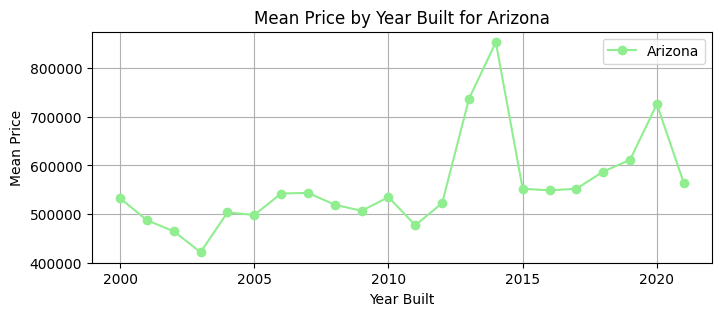

<Figure size 640x480 with 0 Axes>

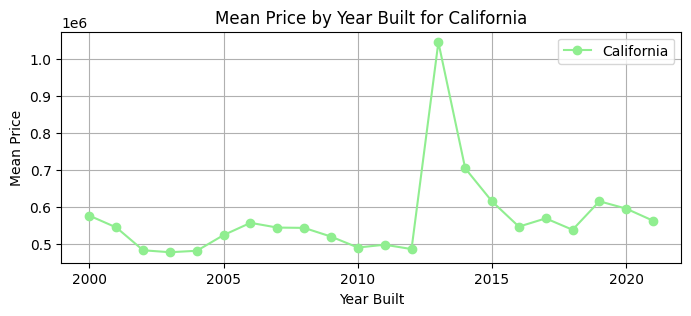

<Figure size 640x480 with 0 Axes>

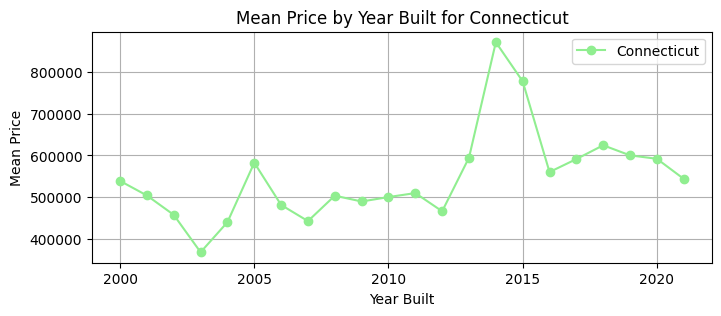

<Figure size 640x480 with 0 Axes>

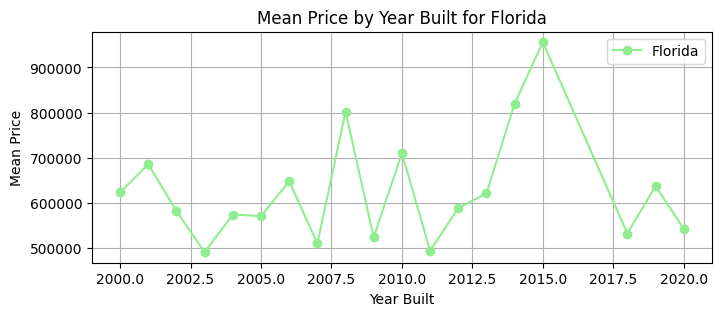

<Figure size 640x480 with 0 Axes>

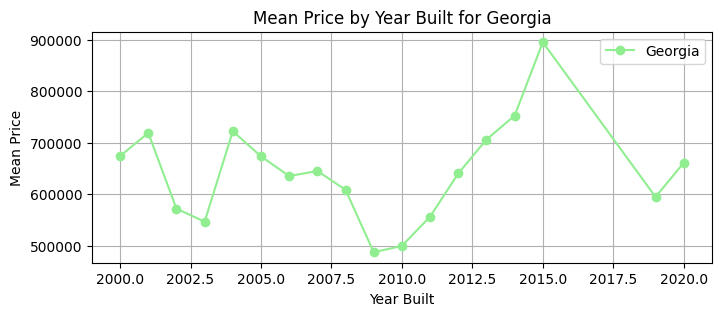

<Figure size 640x480 with 0 Axes>

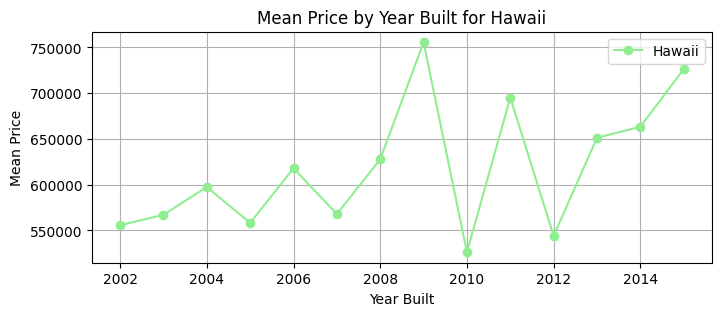

In [ ]:
grouped_data = df.groupby(['Property location', 'yr_built'])['price'].mean().reset_index()

# Create a separate line graph for each property location
unique_locations = grouped_data['Property location'].unique()
for location in unique_locations:
    location_data = grouped_data[grouped_data['Property location'] == location]
    plt.figure()
    plt.figure(figsize=(8, 3)) # Create a new figure for each location
    plt.plot(location_data['yr_built'], location_data['price'],marker='o', color='lightgreen', label=location)
    plt.xlabel('Year Built')
    plt.ylabel('Mean Price')
    plt.title(f'Mean Price by Year Built for {location}')
    plt.legend()
    plt.grid(True)
    plt.show()




*   In year 2014, Average Property Price by Year of Construction is high for city Arizonz and low in year 2003.
*   In year 2013, Average Property Price by Year of Construction is high for city California and low in year 2003.
*   In year 2014, Average Property Price by Year of Construction is high for city Connecticut and low in year 2003.
*   In year 2015, Average Property Price by Year of Construction is high for city Florida and low in year 2003.
*   In year 2015, Average Property Price by Year of Construction is high for city Georgia and low in 2009.
*   In year 2009, Average Property Price by Year of Construction is high for city Hawaii and low in year 2010.







# 6.5 Price difference between properties with and without a basement


In [ ]:
basement_prices = df.groupby(df['sqft_basement'] > 0)['price'].mean()
basement_prices

sqft_basement
False    486884.090507
True     622373.563803
Name: price, dtype: float64



*  If property have basement then price is high for property.



# **7. Associations and Correlations between Variables**


*  Analyze the relationship between the independent variables and the dependent variable that we are trying to predict (i.e., price). Analysis should provide some important insights for our regression models.

We'll be using scatterplots and correlations coefficients (e.g., Pearson, Spearman) to explore potential associations between the variables.



# 7.1 Property Price vs. Square Footage of Living Space (sqft_living):

 Let's analyze the relationship between the square footage of a house (sqft_living) and its selling price. Since the two variables are measured on a continuous scale, we can use Pearson's coefficient r to measures the strength and direction of the relationship.

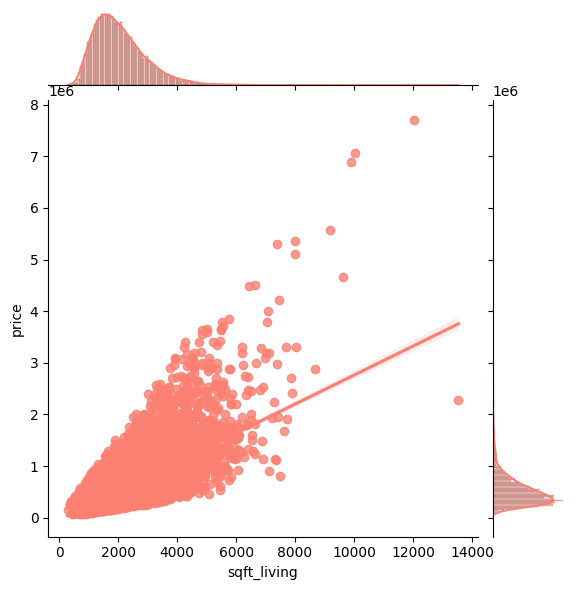

In [ ]:
sns.jointplot(x="sqft_living", y="price", data=df, kind = 'reg', color='salmon')
plt.show()



*  There is a clear linear association between the variables (r = 0.7), indicating a strong positive relationship. sqft_living should be a good predicator of house price. (sqft_living distribution is also skewed to the right)



# 7.2 Spearman correlation

In [ ]:
r, p = stats.spearmanr(df['bedrooms'], df['price'])
print ('spearman correlation r between price and bedrooms is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df['floors'], df['price'])
print ('spearman correlation r between price and floors is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df['view'], df['price'])
print ('spearman correlation r between price and view is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df['grade'], df['price'])
print ('spearman correlation r between price and grade is %s with p = %s' %(r,p))

spearman correlation r between price and bedrooms is 0.33579046516997196 with p = 0.0
spearman correlation r between price and floors is 0.32234655003563695 with p = 0.0
spearman correlation r between price and view is 0.29393116417024306 with p = 0.0
spearman correlation r between price and grade is 0.6582152214259374 with p = 0.0


# 7.3 Price vs sqft_living15( the average house square footage of the 15 closest neighbours)

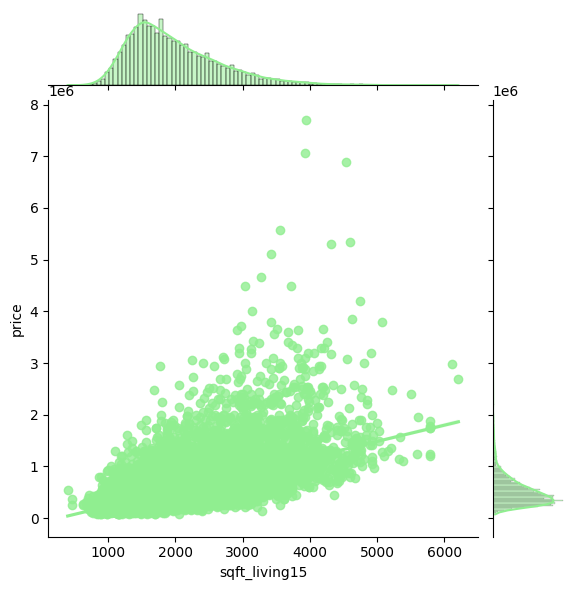

In [ ]:
sns.jointplot(x="sqft_living15", y="price", data=df, kind = 'reg',color='lightgreen')
plt.show()

# 7.4 Price vs sqft_lot15( the average lot square footage of the 15 closest neighbours)

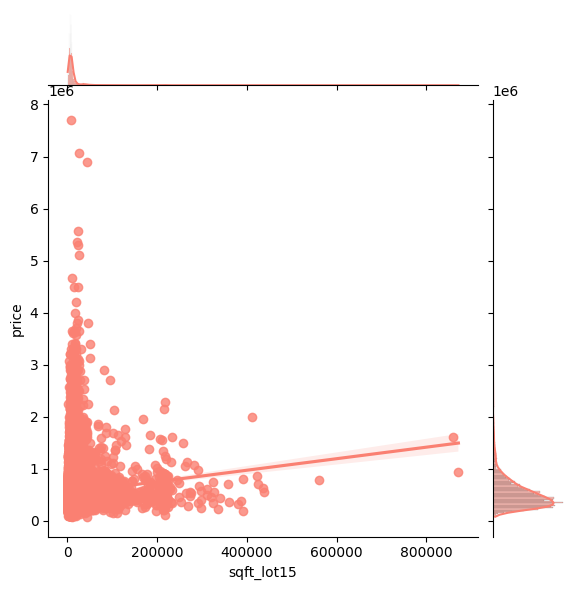

In [ ]:
sns.jointplot(x="sqft_lot15", y="price", data=df, kind = 'reg', color='salmon')
plt.show()

*   sqft_lot15 seem to be poorly related to price.

